## Read input from Matlab file

In [1]:
from keras.models import load_model
import scipy.io as sio 
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Input, Bidirectional
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.python.client import device_lib

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

fileName='inputFeatures1.mat'
i=sio.loadmat(fileName)

TTest=i['TTest']
TTrain=i['TTrain']
XTrain=i['XTrain']
XTest=i['XTest']

XTrain=XTrain.reshape(-1)
TTrain=TTrain.reshape(-1)
XTest=XTest.reshape(-1)
TTest=TTest.reshape(-1)

#TTest=np.transpose(TTest)
#TTrain=np.transpose(TTrain)
#XTrain=np.transpose(XTrain)
#XTest=np.transpose(XTest)

test=np.transpose(XTrain).reshape(-1)
test2=np.transpose(XTest).reshape(-1)

list_test=[]
for i in range(len(test)):
    test[i]=np.transpose(np.array(test[i]))
    list_test.append(test[i])

for j in range(len(test2)):  
    test2[j]=np.transpose(np.array(test2[j]))
    list_test.append(test2[j])  

    
list_test=np.vstack(list_test)
scaler = StandardScaler()
scaler=scaler.fit(list_test)
scaled_list_test=scaler.transform(list_test)
#print(scaled_list_test)
#print(scaled_list_test.shape)

XT_s_stack=list()
i=0
while i+50 <= (len(scaled_list_test)):
    XT_s_stack.append(scaled_list_test[i:i+50])
    i=i+50

#print(listTest)
XT_s_stack=np.stack(XT_s_stack)

cutPoint=np.shape(TTest.reshape(-1))[0]
#print(np.shape(TTest.reshape(-1))[0])

XTrain_s=XT_s_stack[:-cutPoint,:,:]
XTest_s=XT_s_stack[-cutPoint:,:,:]

length = 50
n_features = 4
model = Sequential()
model.add(LSTM(150,input_shape=(length,n_features)))
#model.add(tf.keras.layers.RNN(tf.keras.layers.LSTMCell(150)),input_shape=(length,n_features))
#model.add(Dense(16, activation= 'elu', kernel_initializer='normal'))

#model.add(Dense(1, activation='linear'))
model.add(Dense(1))

#opt=Adam(learning_rate=0.02)
#model.compile(optimizer=opt, loss='mean_squared_logarithmic_error')

model.compile(optimizer='adam', loss='mean_squared_logarithmic_error')
model.summary()

with tf.device('/gpu:0'):
    model.fit(XTrain_s,np.array(TTrain),epochs=1000,verbose=2)
    
with tf.device('/cpu:0'):
    Y_hat=model.predict(XTest_s)


#TTest=TTest.reshape(len(TTest),1)
Test=np.transpose(TTest)
# #print(np.array(TTest))

# test=np.transpose(XTrain).flatten()
# #print(test)
# list_test=list()
# for i in test:
#     #test[i]=np.transpose(np.array(i))
#     list_test.append(np.array(i))

# list_test=np.vstack(list_test)
# x=np.stack(list_test)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               93000     
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 93,151
Trainable params: 93,151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
42/42 - 3s - loss: 4.7940 - 3s/epoch - 79ms/step
Epoch 2/1000
42/42 - 0s - loss: 2.3355 - 370ms/epoch - 9ms/step
Epoch 3/1000
42/42 - 0s - loss: 0.1606 - 367ms/epoch - 9ms/step
Epoch 4/1000
42/42 - 1s - loss: 0.1211 - 568ms/epoch - 14ms/step
Epoch 5/1000
42/42 - 0s - loss: 0.1134 - 444ms/epoch - 11ms/step
Epoch 6/1000
42/42 - 0s - loss: 0.1103 - 437ms/epoch - 10ms/step
Epoch 7/1000
42/42 - 0s - loss: 0.1086 - 471ms/epoch - 11ms/ste

Epoch 116/1000
42/42 - 0s - loss: 0.0373 - 404ms/epoch - 10ms/step
Epoch 117/1000
42/42 - 0s - loss: 0.0363 - 384ms/epoch - 9ms/step
Epoch 118/1000
42/42 - 0s - loss: 0.0367 - 351ms/epoch - 8ms/step
Epoch 119/1000
42/42 - 0s - loss: 0.0363 - 355ms/epoch - 8ms/step
Epoch 120/1000
42/42 - 0s - loss: 0.0371 - 376ms/epoch - 9ms/step
Epoch 121/1000
42/42 - 0s - loss: 0.0354 - 364ms/epoch - 9ms/step
Epoch 122/1000
42/42 - 0s - loss: 0.0374 - 378ms/epoch - 9ms/step
Epoch 123/1000
42/42 - 0s - loss: 0.0386 - 366ms/epoch - 9ms/step
Epoch 124/1000
42/42 - 0s - loss: 0.0406 - 364ms/epoch - 9ms/step
Epoch 125/1000
42/42 - 0s - loss: 0.0379 - 370ms/epoch - 9ms/step
Epoch 126/1000
42/42 - 0s - loss: 0.0356 - 402ms/epoch - 10ms/step
Epoch 127/1000
42/42 - 0s - loss: 0.0359 - 382ms/epoch - 9ms/step
Epoch 128/1000
42/42 - 0s - loss: 0.0358 - 375ms/epoch - 9ms/step
Epoch 129/1000
42/42 - 0s - loss: 0.2722 - 358ms/epoch - 9ms/step
Epoch 130/1000
42/42 - 0s - loss: 0.1155 - 371ms/epoch - 9ms/step
Epoch 13

Epoch 240/1000
42/42 - 0s - loss: 0.0375 - 393ms/epoch - 9ms/step
Epoch 241/1000
42/42 - 0s - loss: 0.0354 - 378ms/epoch - 9ms/step
Epoch 242/1000
42/42 - 0s - loss: 0.0339 - 376ms/epoch - 9ms/step
Epoch 243/1000
42/42 - 0s - loss: 0.0329 - 373ms/epoch - 9ms/step
Epoch 244/1000
42/42 - 0s - loss: 0.0332 - 359ms/epoch - 9ms/step
Epoch 245/1000
42/42 - 0s - loss: 0.0329 - 379ms/epoch - 9ms/step
Epoch 246/1000
42/42 - 0s - loss: 0.0286 - 381ms/epoch - 9ms/step
Epoch 247/1000
42/42 - 0s - loss: 0.0301 - 373ms/epoch - 9ms/step
Epoch 248/1000
42/42 - 0s - loss: 0.0293 - 393ms/epoch - 9ms/step
Epoch 249/1000
42/42 - 0s - loss: 0.0296 - 361ms/epoch - 9ms/step
Epoch 250/1000
42/42 - 0s - loss: 0.0368 - 380ms/epoch - 9ms/step
Epoch 251/1000
42/42 - 0s - loss: 0.0362 - 386ms/epoch - 9ms/step
Epoch 252/1000
42/42 - 0s - loss: 0.0360 - 382ms/epoch - 9ms/step
Epoch 253/1000
42/42 - 0s - loss: 0.0290 - 372ms/epoch - 9ms/step
Epoch 254/1000
42/42 - 0s - loss: 0.0298 - 405ms/epoch - 10ms/step
Epoch 255

Epoch 364/1000
42/42 - 0s - loss: 0.0160 - 379ms/epoch - 9ms/step
Epoch 365/1000
42/42 - 0s - loss: 0.0204 - 377ms/epoch - 9ms/step
Epoch 366/1000
42/42 - 0s - loss: 0.0116 - 387ms/epoch - 9ms/step
Epoch 367/1000
42/42 - 0s - loss: 0.0149 - 376ms/epoch - 9ms/step
Epoch 368/1000
42/42 - 0s - loss: 0.0152 - 383ms/epoch - 9ms/step
Epoch 369/1000
42/42 - 0s - loss: 0.0107 - 376ms/epoch - 9ms/step
Epoch 370/1000
42/42 - 0s - loss: 0.0105 - 382ms/epoch - 9ms/step
Epoch 371/1000
42/42 - 0s - loss: 0.0094 - 381ms/epoch - 9ms/step
Epoch 372/1000
42/42 - 0s - loss: 0.0092 - 395ms/epoch - 9ms/step
Epoch 373/1000
42/42 - 0s - loss: 0.0075 - 362ms/epoch - 9ms/step
Epoch 374/1000
42/42 - 0s - loss: 0.0187 - 389ms/epoch - 9ms/step
Epoch 375/1000
42/42 - 0s - loss: 0.0212 - 370ms/epoch - 9ms/step
Epoch 376/1000
42/42 - 0s - loss: 0.0158 - 377ms/epoch - 9ms/step
Epoch 377/1000
42/42 - 0s - loss: 0.0142 - 395ms/epoch - 9ms/step
Epoch 378/1000
42/42 - 0s - loss: 0.0122 - 397ms/epoch - 9ms/step
Epoch 379/

Epoch 488/1000
42/42 - 0s - loss: 0.0039 - 374ms/epoch - 9ms/step
Epoch 489/1000
42/42 - 0s - loss: 0.0025 - 385ms/epoch - 9ms/step
Epoch 490/1000
42/42 - 0s - loss: 0.0052 - 378ms/epoch - 9ms/step
Epoch 491/1000
42/42 - 0s - loss: 0.0241 - 372ms/epoch - 9ms/step
Epoch 492/1000
42/42 - 0s - loss: 0.0196 - 406ms/epoch - 10ms/step
Epoch 493/1000
42/42 - 0s - loss: 0.0173 - 377ms/epoch - 9ms/step
Epoch 494/1000
42/42 - 0s - loss: 0.0143 - 378ms/epoch - 9ms/step
Epoch 495/1000
42/42 - 0s - loss: 0.0195 - 380ms/epoch - 9ms/step
Epoch 496/1000
42/42 - 0s - loss: 0.0180 - 361ms/epoch - 9ms/step
Epoch 497/1000
42/42 - 0s - loss: 0.0151 - 375ms/epoch - 9ms/step
Epoch 498/1000
42/42 - 0s - loss: 0.0202 - 399ms/epoch - 9ms/step
Epoch 499/1000
42/42 - 0s - loss: 0.0200 - 371ms/epoch - 9ms/step
Epoch 500/1000
42/42 - 0s - loss: 0.0204 - 408ms/epoch - 10ms/step
Epoch 501/1000
42/42 - 0s - loss: 0.0185 - 363ms/epoch - 9ms/step
Epoch 502/1000
42/42 - 0s - loss: 0.0200 - 377ms/epoch - 9ms/step
Epoch 50

Epoch 612/1000
42/42 - 0s - loss: 0.0023 - 376ms/epoch - 9ms/step
Epoch 613/1000
42/42 - 0s - loss: 0.0023 - 397ms/epoch - 9ms/step
Epoch 614/1000
42/42 - 0s - loss: 0.0021 - 368ms/epoch - 9ms/step
Epoch 615/1000
42/42 - 0s - loss: 0.0079 - 402ms/epoch - 10ms/step
Epoch 616/1000
42/42 - 0s - loss: 0.0216 - 365ms/epoch - 9ms/step
Epoch 617/1000
42/42 - 0s - loss: 0.0109 - 376ms/epoch - 9ms/step
Epoch 618/1000
42/42 - 0s - loss: 0.0099 - 384ms/epoch - 9ms/step
Epoch 619/1000
42/42 - 0s - loss: 0.0073 - 370ms/epoch - 9ms/step
Epoch 620/1000
42/42 - 0s - loss: 0.0062 - 370ms/epoch - 9ms/step
Epoch 621/1000
42/42 - 0s - loss: 0.0049 - 379ms/epoch - 9ms/step
Epoch 622/1000
42/42 - 0s - loss: 0.0042 - 364ms/epoch - 9ms/step
Epoch 623/1000
42/42 - 0s - loss: 0.0039 - 366ms/epoch - 9ms/step
Epoch 624/1000
42/42 - 0s - loss: 0.0030 - 393ms/epoch - 9ms/step
Epoch 625/1000
42/42 - 0s - loss: 0.0028 - 376ms/epoch - 9ms/step
Epoch 626/1000
42/42 - 0s - loss: 0.0030 - 377ms/epoch - 9ms/step
Epoch 627

Epoch 735/1000
42/42 - 0s - loss: 0.0088 - 387ms/epoch - 9ms/step
Epoch 736/1000
42/42 - 0s - loss: 0.0102 - 386ms/epoch - 9ms/step
Epoch 737/1000
42/42 - 0s - loss: 0.0088 - 391ms/epoch - 9ms/step
Epoch 738/1000
42/42 - 0s - loss: 0.0063 - 376ms/epoch - 9ms/step
Epoch 739/1000
42/42 - 0s - loss: 0.0052 - 363ms/epoch - 9ms/step
Epoch 740/1000
42/42 - 0s - loss: 0.0038 - 421ms/epoch - 10ms/step
Epoch 741/1000
42/42 - 0s - loss: 0.0039 - 383ms/epoch - 9ms/step
Epoch 742/1000
42/42 - 0s - loss: 0.0044 - 396ms/epoch - 9ms/step
Epoch 743/1000
42/42 - 0s - loss: 0.0031 - 377ms/epoch - 9ms/step
Epoch 744/1000
42/42 - 0s - loss: 0.0025 - 382ms/epoch - 9ms/step
Epoch 745/1000
42/42 - 0s - loss: 0.0021 - 373ms/epoch - 9ms/step
Epoch 746/1000
42/42 - 0s - loss: 0.0049 - 390ms/epoch - 9ms/step
Epoch 747/1000
42/42 - 0s - loss: 0.0031 - 392ms/epoch - 9ms/step
Epoch 748/1000
42/42 - 0s - loss: 0.0030 - 389ms/epoch - 9ms/step
Epoch 749/1000
42/42 - 0s - loss: 0.0020 - 371ms/epoch - 9ms/step
Epoch 750

42/42 - 0s - loss: 0.0203 - 390ms/epoch - 9ms/step
Epoch 857/1000
42/42 - 0s - loss: 0.0194 - 381ms/epoch - 9ms/step
Epoch 858/1000
42/42 - 0s - loss: 0.0190 - 372ms/epoch - 9ms/step
Epoch 859/1000
42/42 - 0s - loss: 0.0183 - 380ms/epoch - 9ms/step
Epoch 860/1000
42/42 - 0s - loss: 0.0172 - 353ms/epoch - 8ms/step
Epoch 861/1000
42/42 - 0s - loss: 0.0165 - 394ms/epoch - 9ms/step
Epoch 862/1000
42/42 - 0s - loss: 0.0161 - 391ms/epoch - 9ms/step
Epoch 863/1000
42/42 - 0s - loss: 0.0201 - 387ms/epoch - 9ms/step
Epoch 864/1000
42/42 - 0s - loss: 0.0188 - 388ms/epoch - 9ms/step
Epoch 865/1000
42/42 - 0s - loss: 0.0173 - 386ms/epoch - 9ms/step
Epoch 866/1000
42/42 - 0s - loss: 0.0159 - 376ms/epoch - 9ms/step
Epoch 867/1000
42/42 - 0s - loss: 0.0140 - 387ms/epoch - 9ms/step
Epoch 868/1000
42/42 - 0s - loss: 0.0139 - 378ms/epoch - 9ms/step
Epoch 869/1000
42/42 - 0s - loss: 0.0118 - 367ms/epoch - 9ms/step
Epoch 870/1000
42/42 - 0s - loss: 0.0119 - 364ms/epoch - 9ms/step
Epoch 871/1000
42/42 - 0s

Epoch 980/1000
42/42 - 0s - loss: 0.0021 - 378ms/epoch - 9ms/step
Epoch 981/1000
42/42 - 0s - loss: 0.0026 - 382ms/epoch - 9ms/step
Epoch 982/1000
42/42 - 0s - loss: 0.0019 - 376ms/epoch - 9ms/step
Epoch 983/1000
42/42 - 0s - loss: 0.0019 - 392ms/epoch - 9ms/step
Epoch 984/1000
42/42 - 0s - loss: 0.0021 - 383ms/epoch - 9ms/step
Epoch 985/1000
42/42 - 0s - loss: 0.0029 - 411ms/epoch - 10ms/step
Epoch 986/1000
42/42 - 0s - loss: 0.0050 - 357ms/epoch - 9ms/step
Epoch 987/1000
42/42 - 0s - loss: 0.0030 - 383ms/epoch - 9ms/step
Epoch 988/1000
42/42 - 0s - loss: 0.0059 - 380ms/epoch - 9ms/step
Epoch 989/1000
42/42 - 0s - loss: 0.0027 - 395ms/epoch - 9ms/step
Epoch 990/1000
42/42 - 0s - loss: 0.0021 - 393ms/epoch - 9ms/step
Epoch 991/1000
42/42 - 0s - loss: 0.0024 - 385ms/epoch - 9ms/step
Epoch 992/1000
42/42 - 0s - loss: 0.0036 - 399ms/epoch - 9ms/step
Epoch 993/1000
42/42 - 0s - loss: 0.0029 - 377ms/epoch - 9ms/step
Epoch 994/1000
42/42 - 0s - loss: 0.0025 - 373ms/epoch - 9ms/step
Epoch 995

In [2]:
print(XTrain_s.shape)
print(TTrain.shape)

(1339, 50, 4)
(1339,)


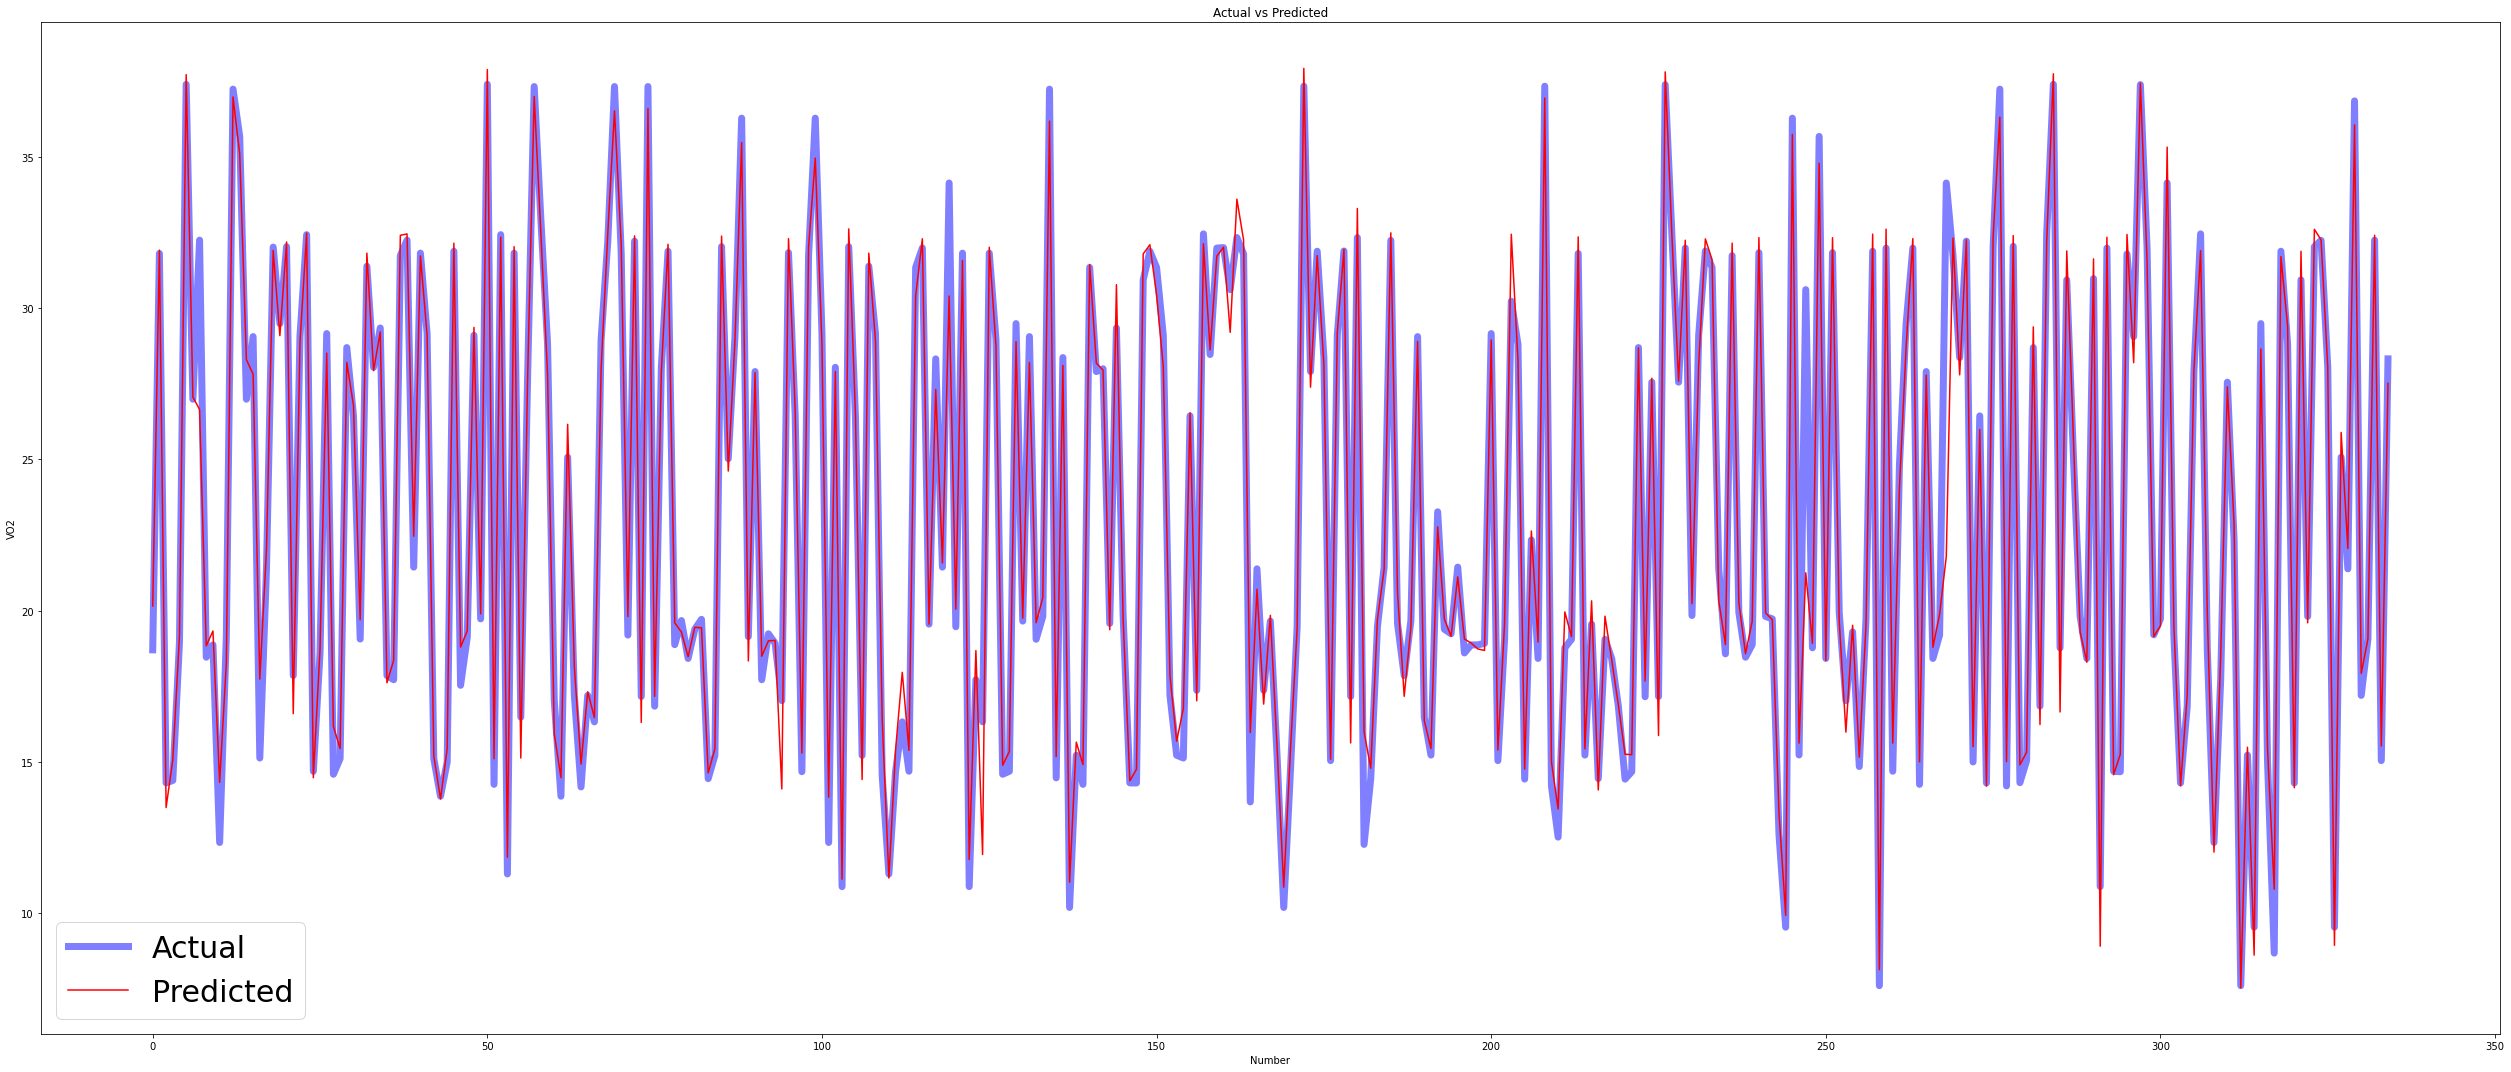

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(35,15))
plt.plot(TTest,color='blue',label='Actual',alpha=0.5,linewidth=7.0)
plt.plot(Y_hat,color='red',label='Predicted')
plt.xlabel('Number')
plt.ylabel('VO2')
plt.title('Actual vs Predicted')
plt.tight_layout()
plt.legend(prop={'size': 30})
plt.savefig('1st-stage-subj-1.jpg',bbox_inches='tight',dpi=150)
plt.show()

11/11 [==============================] - 0s 4ms/step - loss: 0.0029


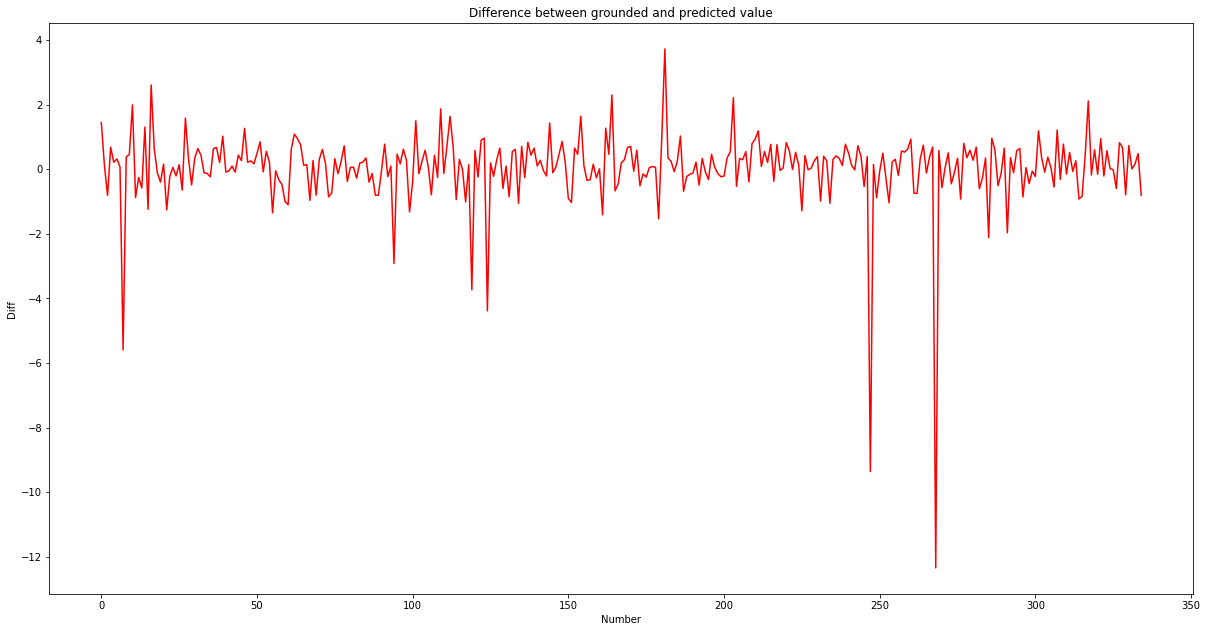

In [4]:
#Y_hat=np.transpose(Y_hat)
TTest=TTest.reshape(len(TTest),1)
#print(Y_hat)
#diff=np.concatenate((Y_hat,TTest),axis=1)
diff=np.subtract(Y_hat,TTest)
#print(diff)

plt.figure(figsize=(20.5,15.5))
plt.plot(diff,color='red')
plt.xlabel('Number')
plt.ylabel('Diff')
plt.title('Difference between grounded and predicted value')
fig = plt.gcf()
fig.set_size_inches(20.5, 10.5)
results = str(model.evaluate(XTest_s,TTest))[0:8]
fig.savefig('1st-stage-subj-1_L'+results+'.jpg', dpi=150)
plt.show()
model.save('1st-stage-subj-1.h5')

In [5]:
print(TTest.shape)
print(XTest.shape)
print(XTrain.shape)
print(TTrain.shape)

(335, 1)
(335,)
(1339,)
(1339,)


In [6]:
print(TTest)

[[18.707 ]
 [31.811 ]
 [14.307 ]
 [14.389 ]
 [18.967 ]
 [37.404 ]
 [26.993 ]
 [32.252 ]
 [18.463 ]
 [18.87  ]
 [12.337 ]
 [19.144 ]
 [37.244 ]
 [35.681 ]
 [26.993 ]
 [29.063 ]
 [15.13  ]
 [21.385 ]
 [32.022 ]
 [29.493 ]
 [32.037 ]
 [17.856 ]
 [29.063 ]
 [32.433 ]
 [14.689 ]
 [18.604 ]
 [29.163 ]
 [14.593 ]
 [15.111 ]
 [28.7   ]
 [26.441 ]
 [19.063 ]
 [31.389 ]
 [28.048 ]
 [29.348 ]
 [17.856 ]
 [17.719 ]
 [31.741 ]
 [32.252 ]
 [21.441 ]
 [31.822 ]
 [29.163 ]
 [15.111 ]
 [13.867 ]
 [15.    ]
 [31.885 ]
 [17.533 ]
 [19.122 ]
 [29.107 ]
 [19.73  ]
 [37.404 ]
 [14.259 ]
 [32.433 ]
 [11.296 ]
 [31.822 ]
 [16.481 ]
 [27.556 ]
 [37.33  ]
 [32.941 ]
 [28.807 ]
 [17.026 ]
 [13.867 ]
 [25.074 ]
 [17.2   ]
 [14.174 ]
 [17.2   ]
 [16.326 ]
 [28.963 ]
 [32.219 ]
 [37.33  ]
 [31.837 ]
 [19.193 ]
 [32.219 ]
 [17.163 ]
 [37.33  ]
 [16.844 ]
 [28.048 ]
 [31.885 ]
 [18.878 ]
 [19.674 ]
 [18.422 ]
 [19.389 ]
 [19.715 ]
 [14.448 ]
 [15.215 ]
 [32.037 ]
 [25.022 ]
 [29.063 ]
 [36.285 ]
 [19.144 ]
 [27.907 ]

In [7]:
res=np.concatenate((Y_hat,TTest),axis=1)
print(res)
pd.DataFrame(res).to_csv('Subj1-predict.csv')


[[20.15681648 18.707     ]
 [31.92026901 31.811     ]
 [13.49329185 14.307     ]
 [15.07236671 14.389     ]
 [19.18139076 18.967     ]
 [37.72378159 37.404     ]
 [27.06409836 26.993     ]
 [26.65424728 32.252     ]
 [18.84060287 18.463     ]
 [19.32817268 18.87      ]
 [14.3261652  12.337     ]
 [18.26513863 19.144     ]
 [36.98561859 37.244     ]
 [35.0990715  35.681     ]
 [28.2984333  26.993     ]
 [27.82143974 29.063     ]
 [17.73921776 15.13      ]
 [22.01930809 21.385     ]
 [31.91110229 32.022     ]
 [29.09389877 29.493     ]
 [32.19233322 32.037     ]
 [16.59670639 17.856     ]
 [28.84508896 29.063     ]
 [32.48780823 32.433     ]
 [14.47916031 14.689     ]
 [18.74215126 18.604     ]
 [28.51667023 29.163     ]
 [16.17540932 14.593     ]
 [15.44363594 15.111     ]
 [28.21126175 28.7       ]
 [26.78380585 26.441     ]
 [19.70293999 19.063     ]
 [31.82253838 31.389     ]
 [27.93750381 28.048     ]
 [29.21660423 29.348     ]
 [17.61966896 17.856     ]
 [18.35551262 17.719     ]
 